### [ 다중 선형 회귀 ]
---
- 행렬 곱셈 연산 또는 벡터 내적 연산(Dot Product)
    * 다중 x와 가중치 w 곱셈
        * [조건] 좌측에 있는 행렬의 열의 크기 == 우측에 있는 행렬의 행의 크기
        * [예시] (5 x 3) x (3 x 1)
        
            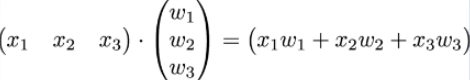

            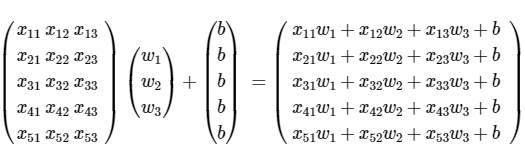
    
    
    * 파이토치 Tensor에 메서드 제공 ==>  tensor.matmul()
    

In [1]:
#모듈 로딩 ----------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 랜덤 시드 설정 ------------------------------
torch.manual_seed(1)

In [3]:
# 훈련데이터 -----------------------------------
x_train  =  torch.FloatTensor([[73,  80,  75],  # 5행 3열
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]]) # 각 행마다 값이 있어야 함 - 5행 1열 : 2차원

In [4]:
print(f'x_train :  {x_train.shape}, {x_train.ndim}차원')
print(f'y_train :  {y_train.shape}, {y_train.ndim}차원')

x_train :  torch.Size([5, 3]), 2차원
y_train :  torch.Size([5, 1]), 2차원


In [5]:
# 모델 초기화 ---------------------------------------------
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True) # 3행 1열
b = torch.zeros(1, requires_grad=True)

In [6]:
print(f'W ==> \n{W}\n\nb ==> {b}')

W ==> 
tensor([[0.],
        [0.],
        [0.]], requires_grad=True)

b ==> tensor([0.], requires_grad=True)


In [7]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

In [8]:
# 학습 진행 -------------------------------------------------
nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 조건없이 학습 진행 사항 출력
    print(f'Epoch {epoch:4d}/{nb_epochs} hypothesis: { hypothesis.squeeze().detach()} Cost: {cost.item():.6f}')
    

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670898
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.482086
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

In [12]:
# 예측 ------------------------------------------------------
# [[73,  80,  75]
pre_y=W[0]*73 + W[1]*80 + W[2]*75 + b

print(f'[73,  80,  75] pre_y => {pre_y.item()} : {y_train[0].item()}')

[73,  80,  75] pre_y => 154.05426025390625 : 152.0
